In [1]:
import pandas as pd

In [4]:
d = pd.read_csv(r'C:\Users\hanaminrenly\Downloads\排除达人.csv', usecols = ['user_id', '直卖佣金', 'yongjin_amt', 'pay_amt',
       'cashout_amt'])

In [5]:
d.columns

Index(['user_id', '直卖佣金', 'yongjin_amt', 'pay_amt', 'cashout_amt'], dtype='object')

In [6]:
d.describe()

,user_id,直卖佣金,yongjin_amt,pay_amt,cashout_amt
count,5.190562e+06,5.190562e+06,5.190562e+06,5.190562e+06,5.190562e+06
mean,6.195226e+07,5.468003e+01,2.446012e+01,7.069394e+02,5.853184e+01
std,4.104197e+07,1.272131e+03,8.334793e+03,2.672434e+05,1.591653e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.479313e+07,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.864987e+07,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.557837e+07,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00
max,1.515114e+08,1.377527e+06,1.884935e+07,6.046502e+08,1.273106e+06


In [7]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

In [9]:
var = d[['直卖佣金', 'yongjin_amt', 'cashout_amt']]

In [10]:
scaler = StandardScaler()
scaled_variables = scaler.fit_transform(var)

In [11]:
sum_of_squared_distances = []
K = range(3,7)
for k in K:
    km = KMeans(n_clusters=k, init='random', n_init=10, random_state = 42)
    km = km.fit(scaled_variables)
    sum_of_squared_distances.append(km.inertia_)

In [12]:
from matplotlib import pyplot as plt

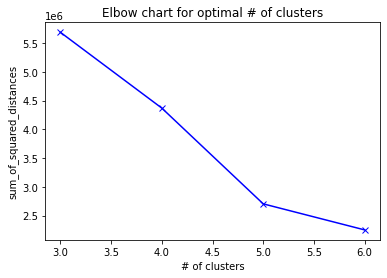

In [13]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('# of clusters')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow chart for optimal # of clusters')
plt.show()

In [14]:
kmeans = KMeans(n_clusters= 5, init='random', n_init=10, random_state = 42)
pred_y = kmeans.fit_predict(scaled_variables)
var['cluster'] = pred_y
var.describe()

<ipython-input-14-ab6cfef6b4f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var['cluster'] = pred_y


,直卖佣金,yongjin_amt,cashout_amt,cluster
count,5.190562e+06,5.190562e+06,5.190562e+06,5.190562e+06
mean,5.468003e+01,2.446012e+01,5.853184e+01,7.633085e-04
std,1.272131e+03,8.334793e+03,1.591653e+03,3.901021e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00
max,1.377527e+06,1.884935e+07,1.273106e+06,4.000000e+00


In [15]:
output = pd.concat([var[['cluster']].reset_index(drop=True),d.reset_index(drop=True)], axis=1)

In [16]:
output.describe()

,cluster,user_id,直卖佣金,yongjin_amt,pay_amt,cashout_amt
count,5.190562e+06,5.190562e+06,5.190562e+06,5.190562e+06,5.190562e+06,5.190562e+06
mean,7.633085e-04,6.195226e+07,5.468003e+01,2.446012e+01,7.069394e+02,5.853184e+01
std,3.901021e-02,4.104197e+07,1.272131e+03,8.334793e+03,2.672434e+05,1.591653e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.479313e+07,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.864987e+07,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,9.557837e+07,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+00,1.515114e+08,1.377527e+06,1.884935e+07,6.046502e+08,1.273106e+06


In [17]:
output.to_csv(r'C:\Users\hanaminrenly\Downloads\域外值达人聚类结果new.csv')